# 03 Android applications 3 - Socket Programming

## 6) Network
1) Communicting with the Server
- Socket programming (low-level communication): communicating through Socket Server. Highly efficient, but difficult to programme.
  - Mainly used for games and chat services.
- Web Server programming (high-level communication): uses Web Server class, less efficient than socket programming, but easier to programme.
  - Used in areas where large volumes of data are sent in real time such as games and chats.
  - WebSocket, featuring low-level communication but written like Web Server, is gaining popularity.

7. Socket Programming
1) TCP and UDP
- TCP (Transmission Control Protocol): client server sends requests and wait. The server receives the request, generates a response and sends it (on waiting state now). Then the client receives the response and sends the response to the server again.
- UDP (User Datagram Protocol): Sender sends to receiver. One-way communication. Used when sending small volume of data (sending data on smartphone, video conference...)

### Server Socket 

In [ ]:
from socket import *

try:
    # Create TCP server socket
    server_socket = socket(AF_INET, SOCK_STREAM)
    # Bind server - meaning, to run the server to allow clients to connect.
    # One port number is one process.
    # it is a number to identify programmes.
    server_socket.bind(('http://172.30.1.10:5000/', 8000))
    # Set the number of clients (Backlog) that a server can accept
    server_socket.listen(1)

    while True:
        print("Server waiting...")
        # Connect if a client makes a request
        conn, addr = server_socket.accept()
        # print client data
        print(addr)
        # Check client message
        # 1024 can receive up to 330 characters
        b = conn.recv(1024)
        # Send message to client. Be sure to encode message when sending.
        conn.send("Hi Android. How are you doing today?".encode())
        # Check sent message
        print(b.decode())
        # Disconnect
        conn.close()

except Exception as e:
    print("Error occurred: ", e)
finally:
    # if you want to disconnect here at this point, it is also fine.
    print('Run on close.')

Client Socket

In [ ]:
# Client server
from socket import *

try:
    sock = socket(AF_INET, SOCK_STREAM)
    sock.connect(('172.30.1.10:5000', 5000))
    msg = input("message to send:")
    sock.send("Hello, Android".encode())
    b = sock.recv(1024)
    print(b.decode())
    sock.close()
    
except Exception as e:
    print('Error:', e)

Now, create a new Activity named SocketActivity on Android Studio.
Be sure to tick the box **Launcher Activity**.

In [ ]:
# activity_socket.xml

<RelativeLayout xmlns:android="http://schemas.android.com/apk/res/android" ... >

    <TextView
        android:layout_width="wrap_content"
        android:layout_height="wrap_content"
        android:id="@+id/text"
        android:text="Click to send message"
        android:layout_centerHorizontal="true"
        android:layout_centerVertical="true"/>

    <Button
        android:layout_width="wrap_content"
        android:layout_height="wrap_content"
        android:id="@+id/btn"
        android:layout_below="@+id/text"
        android:layout_centerHorizontal="true"
        android:layout_marginTop="20dp"
        android:text="send message"
        android:textSize="20sp"
        android:textStyle="bold" />

    <EditText
        android:layout_width="wrap_content"
        android:layout_height="wrap_content"
        android:id="@+id/edit"
        android:layout_below="@+id/btn"
        android:layout_centerHorizontal="true"
        android:layout_marginTop="20dp"
        android:text="Send a message"
        android:textSize="20sp"
        android:textStyle="bold"
        android:hint="Enter a message"/>

</RelativeLayout>

In [ ]:
# SocketActivity.java

package com.example.pythonproj;

import androidx.appcompat.app.AppCompatActivity;
import android.os.Bundle;

public class SocketActivity extends AppCompatActivity {

    @Override
    protected void onCreate(Bundle savedInstanceState) {
        super.onCreate(savedInstanceState);
        setContentView(R.layout.activity_socket);
    }
}

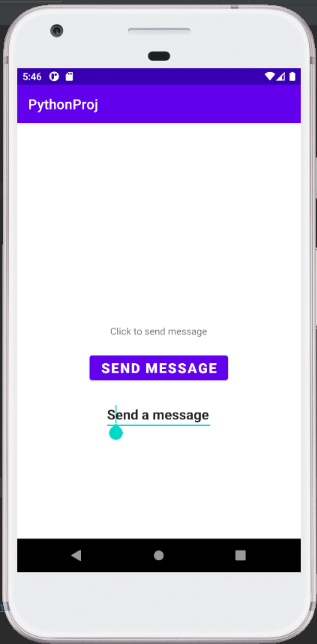

In [2]:
import cv2
from google.colab.patches import cv2_imshow

path = "/content/android_socket.png"
android_socket = cv2.imread(path)
android_socket = cv2.resize(android_socket, dsize=(0,0), fx=0.75, fy=0.75)
cv2_imshow(android_socket)

# Error Notes

      Error occurred:  socket.bind() takes exactly one argument (2 given)
  - ```server_socket.bind(('http://000.00.0.00:5000/', 8000))```
  - ```.bind``` takes data in only one tuple.

      Error occurred:  [Errno 11001] getaddrinfo failed

gaierror: [Errno 11001] getaddrinfo failed is caused **when the code is being called from behind a firewall or proxy**. Please ensure the application has access to port 80. Thank you for the answer. 
